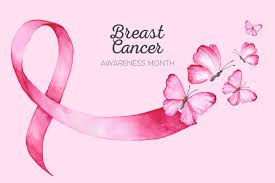

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# "Importing The data"

In [ ]:
df=pd.read_csv('../input/breast-cancer-wisconsin-data/data.csv')
df.head()

In [ ]:
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
import scipy.optimize as opt
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
%matplotlib inline 
import matplotlib.pyplot as plt

In [ ]:
df.describe()

In [ ]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True)
df.head()

In [ ]:
sns.pairplot(df, hue='diagnosis', vars = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean'])

In [ ]:
sns.scatterplot(x='radius_mean',y='area_mean',hue='diagnosis',data=df)
plt.ioff()

In [ ]:
count = df.diagnosis.value_counts()
count

In [ ]:
df['target'] = df.diagnosis.map({'B':0, 'M':1})

In [ ]:
df.dtypes

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(df.corr(),annot=True)

# Splitting data into test and train set

In [ ]:
X =df.iloc[:, 1:-1]
y = df['target']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)
X.head()

 # THE MODEL USED IS SUPPORT VECTOR MACHINE (RBF )

In [ ]:
from sklearn import svm
clf = svm.SVC(kernel='rbf')
clf.fit(X_train, y_train) 

In [ ]:
yhat = clf.predict(X_test)
yhat [0:5]

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import itertools

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat, labels=[0,1])
np.set_printoptions(precision=2)
print (classification_report(y_test, yhat))

In [ ]:
cm = confusion_matrix(y_test, yhat)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat, average='weighted') 

 # The Model only gives 86 % accuracy which is not good.

 # Feature Scaling is done to increase the accuracy of the model

In [ ]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train_sc=sc.fit_transform(X_train)
X_test_sc=sc.fit_transform(X_test)

In [ ]:
from sklearn import svm
clf1 = svm.SVC(kernel='rbf')
clf1.fit(X_train_sc, y_train) 

In [ ]:
yhat_sc = clf1.predict(X_test_sc)
yhat_sc [0:5]

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat_sc, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_sc))

In [ ]:
cm = confusion_matrix(y_test, yhat_sc)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_sc, average='weighted')

# THE ACCURACY INCRAESED TO 97 % 

In [ ]:
from sklearn import svm
clf2 = svm.SVC(kernel='linear')
clf2.fit(X_train_sc, y_train) 

In [ ]:
yhat_sc_ln = clf2.predict(X_test_sc)
yhat_sc_ln [0:5]

In [ ]:
cnf_matrix = confusion_matrix(y_test, yhat_sc_ln, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, yhat_sc_ln))

In [ ]:
cm = confusion_matrix(y_test, yhat_sc_ln)
sns.heatmap(cm,annot=True,fmt="d")

In [ ]:
from sklearn.metrics import f1_score
f1_score(y_test, yhat_sc_ln, average='weighted')

 # The acurracy is better with rbf & feature scaling rather than linear function &  feature scaling

#  Using Grid Search for parameters tuning 

One of the great things about GridSearchCV is that it is a meta-estimator. It takes an estimator like SVC, and creates a new estimator, that behaves exactly the same – in this case, like a classifier. You should add refit=True and choose verbose to whatever number you want, higher the number, the more verbose (verbose just means the text output describing the process)

In [ ]:
from sklearn.model_selection import GridSearchCV 
param_grid = {'C': [0.1, 1, 10, 100, 1000],  
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001], 
              'kernel': ['rbf']}  
grid = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 3)  
grid.fit(X_train_sc, y_train)

In [ ]:
print(grid.best_params_) 
print(grid.best_estimator_)

In [ ]:
grid_predictions = grid.predict(X_test_sc) 
print(classification_report(y_test, grid_predictions))